In [ ]:
##<script>
##  jQuery(document).ready(function($) {  
##  
##  $(window).on('load', function(){
##    $('#preloader').fadeOut('slow',function(){$(this).remove();});
##  });
##  
##  });
##</script>
##
##<style type="text/css">
##  div#preloader { position: fixed; 
##      left: 0; 
##      top: 0; 
##      z-index: 999; 
##      width: 100%; 
##      height: 100%; 
##      overflow: visible; 
##      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center; 
##  }
##
##</style>
##
##<div id="preloader">
##
##</div>

<a id='load'></a>
# 0. Load data and excluding participants

Participants 6, 33, 7, 17, 25, 30 should be excluded.Additionally, it was checked that trials in which participants did not fixate in any of the items were were skipped already. Therefore, 7 participants have been excluded.
Total number subjects = 40
Number of subjects remaining = =33

In [10]:
# Load data all participants
#data_exp1 = pd.read_csv('/Users/pradyumna/Documents/gitDocs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/DataFoodFramingNotebook_v1.csv') 

for i in [6, 7, 17, 25, 30, 33]:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 37 38 39]
Number of participants: 33


In [11]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})
data_exp1.columns

Index(['Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LItem', 'LVal', 'RItem',
       'RVal', 'Choice', 'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT',
       'LDwellTime', 'RDwellTime', 'GSF', 'LastFixat', 'DVal', 'zDVal',
       'AbsDVal', 'zAbsDVal', 'zConf', 'zRT', 'DFam', 'LFam', 'RFam', 'TotFam',
       'TotVal', 'ChosenFam', 'UnchosenFam', 'ChosenVal', 'UnchosenVal',
       'Correct', 'LValConfBDM', 'LFamConfBDM', 'RValConfBDM', 'RFamConfBDM',
       'zDFam', 'zTotFam', 'zTotVal', 'zChosenVal', 'zUnchosenVal',
       'zChosenFam', 'zUnchosenFam', 'zGSF', 'zDDT', 'zAbsDDT', 'zAbsDFam',
       'zLVal', 'zRVal', 'zLFam', 'zRFam', 'zLValConfBDM', 'zLFamConfBDM',
       'zRValConfBDM', 'zRFamConfBDM', 'ConfSplit', 'GSFSplit', 'DDTSplit'],
      dtype='object')

In [12]:
# Just to generate additional file with all the measures separated by condition
data_expL = data_exp1.loc[data_exp1['BlockCond'] == 1] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[data_exp1['BlockCond'] == 2] 


In [247]:
choice_models = ['Empty', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5',
                 'Model 6', 'Model 7','Model 8']
choice_formulas = ['Choice ~ 1', 'Choice ~ Difference in Value', 'Choice ~ Difference in Value + Confidence',
                   'Choice ~ Difference in Value + Confidence + Total Value',
                  'Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time',
                  'Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence',
                  'Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence + Difference in Value * Total Value',
                  'Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence + Difference in Value * Total Value + Confidence * Difference in Dwell Time',
                   'Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Gaze Shift Frequency + Difference in Value * Confidence + Difference in Value * Total Value + Confidence * Difference in Dwell Time + Difference in Value * Gaze Shift Frequency']
Choice_Table = pd.DataFrame([choice_models, choice_formulas])
Choice_Table = Choice_Table.transpose(); Choice_Table.columns = ['Models', 'Formulas']
Choice_Table_like = Choice_Table.copy()
Choice_Table_dislike = Choice_Table.copy()
pd.set_option('max_colwidth', 300)
Choice_Table

,Models,Formulas
0,Empty,Choice ~ 1
1,Model 1,Choice ~ Difference in Value
2,Model 2,Choice ~ Difference in Value + Confidence
3,Model 3,Choice ~ Difference in Value + Confidence + Total Value
4,Model 4,Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time
5,Model 5,Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence
6,Model 6,Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence + Difference in Value * Total Value
7,Model 7,Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Difference in Value * Confidence + Difference in Value * Total Value + Confidence * Difference in Dwell Time
8,Model 8,Choice ~ Difference in Value + Confidence + Total Value + Difference in Dwell Time + Gaze Shift Frequency + Difference in Value * Confidence + Difference in Value * Total Value + Confidence * Difference in Dwell Time + Difference in Value * Gaze Shift Frequency


# Load dataframe in R

In [14]:
%R -i data_exp1

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [15]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$BlockCond=='1'),]
data_exp1_DisLike <- data_exp1[ which(data_exp1$BlockCond=='2'),]

# Choice Models

## Models for like frame
---------------------------------------------------
we test various nested models

In [16]:
%%R
choice_emptya_L = glmer(Choice ~ 1 + (1 | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_1L =  glmer(Choice ~ zDVal + (zDVal | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Run!"


In [18]:
%%R

choice_model_2L =  glmer(Choice ~ zDVal + zConf + (zDVal + zConf | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_3L =  glmer(Choice ~ zDVal + zConf + zTotVal +  (zDVal + zConf + zTotVal | Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [22]:
%%R
choice_model_4L =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT +  (zDVal + zConf
                        + zTotVal  + zDDT | Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_5L =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + 
                        (zDVal + zConf + zTotVal + zDDT  + zConf:zDVal | Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [28]:
%%R
choice_model_6L =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + 
                        (zDVal + zConf + zTotVal + zDDT  + zConf:zDVal + zTotVal:zDVal | Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_7L =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                        (zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf | Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_8L =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                         zGSF + zGSF:zDVal + (zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                         zGSF + zGSF:zDVal| Part),
                         data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


## Model comparison¶


In [104]:
%%R
save(choice_emptya_L, choice_model_1L, choice_model_2L,
                    choice_model_3L, choice_model_4L, choice_model_5L,
                   choice_model_6L, choice_model_7L,choice_model_8L, file = "SavedModels/ComparisonModels_Choice_Like_m1_33part.rda")

In [105]:
%%R
comparison_choice_L =anova(choice_emptya_L, choice_model_1L, choice_model_2L,
                    choice_model_3L, choice_model_4L, choice_model_5L,
                   choice_model_6L, choice_model_7L,choice_model_8L)
BIC1_choice_L = list(comparison_choice_L$BIC)

In [106]:
%%R
comparison_choice_L

Data: data_exp1_Like
Models:
choice_emptya_L: Choice ~ 1 + (1 | Part)
choice_model_1L: Choice ~ zDVal + (zDVal | Part)
choice_model_2L: Choice ~ zDVal + zConf + (zDVal + zConf | Part)
choice_model_3L: Choice ~ zDVal + zConf + zTotVal + (zDVal + zConf + zTotVal | 
choice_model_3L:     Part)
choice_model_4L: Choice ~ zDVal + zConf + zTotVal + zDDT + (zDVal + zConf + zTotVal + 
choice_model_4L:     zDDT | Part)
choice_model_5L: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + (zDVal + 
choice_model_5L:     zConf + zTotVal + zDDT + zConf:zDVal | Part)
choice_model_6L: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal + 
choice_model_6L:     (zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal | 
choice_model_6L:         Part)
choice_model_7L: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal + 
choice_model_7L:     zDDT:zConf + (zDVal + zConf + zTotVal + zDDT + zConf:zDVal + 
choice_model_7L:     zTotVal:zDVal + zDDT:zConf | Part)
cho

In [151]:
%R -o BIC1_choice_L
BIC1a = np.array(BIC1_choice_L); BIC1a = BIC1a[0]
Choice_Table_like['BIC'] = BIC1a


In [83]:
#BIC_bar(Choice_Table_like.loc[1:, :].copy().reset_index(drop=True), title='',color1 = '#4F6A9A' )
#plt.tight_layout()
#plt.savefig('../../figures/exp1_choice_models.png', dpi=600)

## Models for dislike frame
---------------------------------------------------------
we test various nested models

In [55]:
%%R
choice_emptya_D = glmer(Choice ~ 1 + (1 | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_1D =  glmer(Choice ~ zDVal + (zDVal | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [56]:
%%R

choice_model_2D =  glmer(Choice ~ zDVal + zConf + (zDVal + zConf | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_3D =  glmer(Choice ~ zDVal + zConf + zTotVal +  (zDVal + zConf + zTotVal | Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [57]:
%%R
choice_model_4D =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT +  (zDVal + zConf
                        + zTotVal  + zDDT | Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_5D =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + 
                        (zDVal + zConf + zTotVal + zDDT  + zConf:zDVal | Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [58]:
%%R
choice_model_6D =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + 
                        (zDVal + zConf + zTotVal + zDDT  + zConf:zDVal + zTotVal:zDVal | Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_7D =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                        (zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf | Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

choice_model_8D =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                         zGSF + zGSF:zDVal + (zDVal + zConf + zTotVal + zDDT + zConf:zDVal  + zTotVal:zDVal + zDDT:zConf +
                         zGSF + zGSF:zDVal| Part),
                         data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


## Model comparison¶


In [101]:
%%R
save(choice_emptya_D, choice_model_1D, choice_model_2D,
                    choice_model_3D, choice_model_4D, choice_model_5D,
                   choice_model_6D, choice_model_7D,choice_model_8D, file = "SavedModels/ComparisonModels_Choice_Dislike_m1_33part.rda")

In [102]:
%%R
comparison_choice_D =anova(choice_emptya_D, choice_model_1D, choice_model_2D,
                    choice_model_3D, choice_model_4D, choice_model_5D,
                   choice_model_6D, choice_model_7D,choice_model_8D)
BIC1_choice_D = list(comparison_choice_D$BIC)

In [103]:
%%R
comparison_choice_D

Data: data_exp1_DisLike
Models:
choice_emptya_D: Choice ~ 1 + (1 | Part)
choice_model_1D: Choice ~ zDVal + (zDVal | Part)
choice_model_2D: Choice ~ zDVal + zConf + (zDVal + zConf | Part)
choice_model_3D: Choice ~ zDVal + zConf + zTotVal + (zDVal + zConf + zTotVal | 
choice_model_3D:     Part)
choice_model_4D: Choice ~ zDVal + zConf + zTotVal + zDDT + (zDVal + zConf + zTotVal + 
choice_model_4D:     zDDT | Part)
choice_model_5D: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + (zDVal + 
choice_model_5D:     zConf + zTotVal + zDDT + zConf:zDVal | Part)
choice_model_6D: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal + 
choice_model_6D:     (zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal | 
choice_model_6D:         Part)
choice_model_7D: Choice ~ zDVal + zConf + zTotVal + zDDT + zConf:zDVal + zTotVal:zDVal + 
choice_model_7D:     zDDT:zConf + (zDVal + zConf + zTotVal + zDDT + zConf:zDVal + 
choice_model_7D:     zTotVal:zDVal + zDDT:zConf | Part)


In [152]:
%R -o BIC1_choice_D
BIC1d = np.array(BIC1_choice_D); BIC1d = BIC1d[0]
Choice_Table_dislike['BIC'] = BIC1d

In [178]:
%R -o BIC1_choice_D -o BIC1_choice_L

Choice_Table_like1 = np.array(BIC1_choice_L)[0]
Choice_Table_dislike1 = np.array(BIC1_choice_D)[0]

In [248]:
Choice_Table_like['BIC'] = Choice_Table_like1
Choice_Table_dislike['BIC'] = Choice_Table_dislike1

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


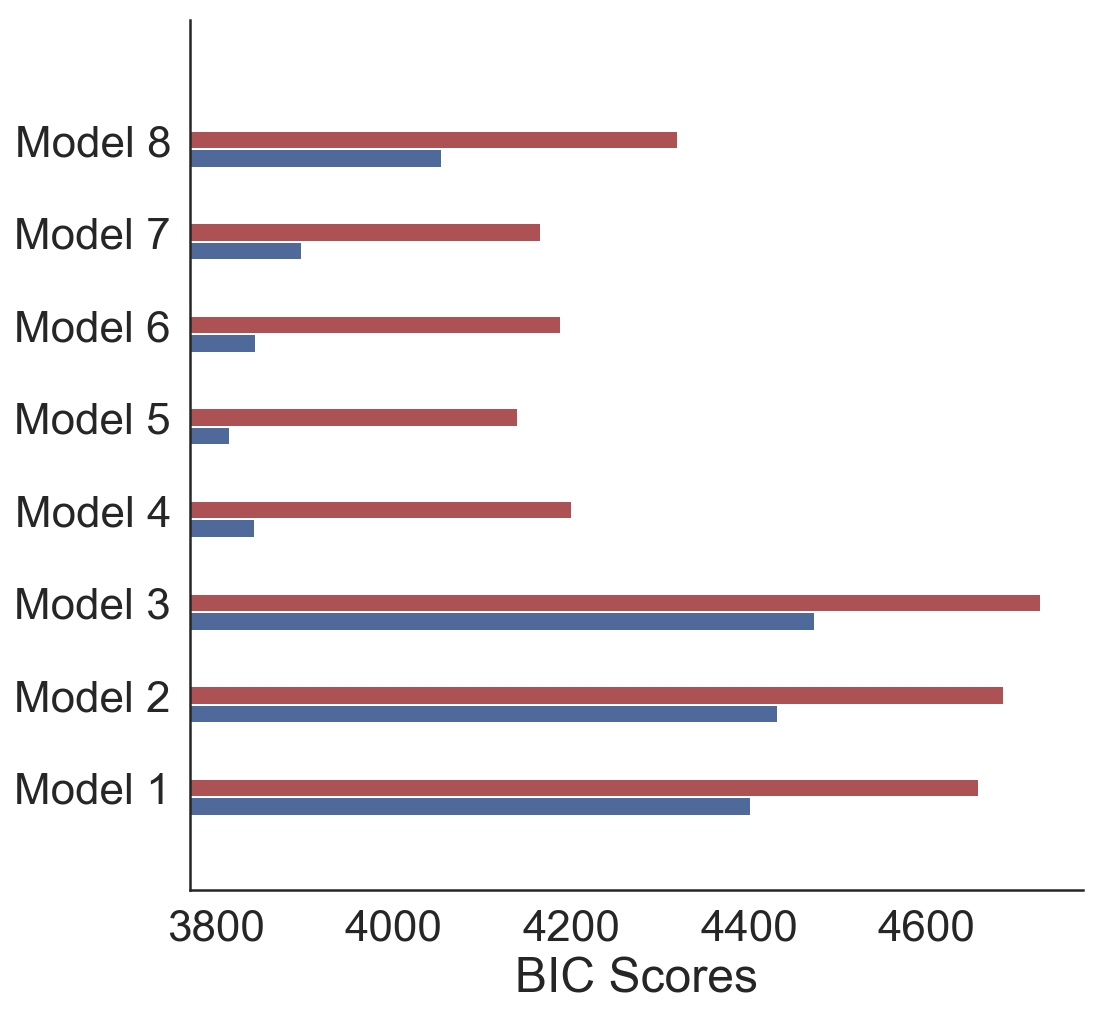

In [281]:
## Plot both conditions
#BIC_bar(Choice_Table_like.loc[1:, :].copy().reset_index(drop=True), title='Like',color1 = '#4F6A9A' )
#BIC_bar(Choice_Table_dislike.loc[1:, :].copy().reset_index(drop=True), title='Dislike',color1 = '#AC5255' )

#plt.tight_layout()
#plt.savefig('../../figures/exp1_choice_models.png', dpi=600)
#BIC_bar2(Choice_Table_like.loc[1:, :].copy().reset_index(drop=True),Choice_Table_dislike.loc[1:, :].copy().reset_index(drop=True), title='',color1 ='#4F6A9A',color2 ='#AC5255' )
BIC_bar2(Choice_Table_like.loc[1:, :].copy().reset_index(drop=True),Choice_Table_dislike.loc[1:, :].copy().reset_index(drop=True), title='',color1 ='#4F6A9A',color2 ='#AC5255' )

------------------------------------------------------
------------------------------------------------------
# Confidence Models
-------------------------------------------------------
-------------------------------------------------------

In [254]:
confidence_models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
confidence_formulas = ['Confidence ~ |Difference in Value|', 'Confidence ~ |Difference in Value| + Response Time',
                  'Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency',
                  'Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency + Total Value',
                      'Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency + Total Value + Difference in Dwell Time']
Confidence_1_Table = pd.DataFrame([confidence_models, confidence_formulas])
Confidence_1_Table = Confidence_1_Table.transpose(); Confidence_1_Table.columns = ['Models', 'Formulas']
Confidence_Table_like = Confidence_1_Table.copy()
Confidence_Table_dislike = Confidence_1_Table.copy()
Confidence_1_Table

,Models,Formulas
0,Model 1,Confidence ~ |Difference in Value|
1,Model 2,Confidence ~ |Difference in Value| + Response Time
2,Model 3,Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency
3,Model 4,Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency + Total Value
4,Model 5,Confidence ~ |Difference in Value| + Response Time + Gaze Shift Frequency + Total Value + Difference in Dwell Time


## Models for like frame
---------------------------------------------------
we test various nested models

In [258]:
%%R
confidence_model_1L = lmer(zConf ~ 0 + zAbsDVal + (0 + zAbsDVal | Part), data=data_exp1_Like,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_2L = lmer(zConf ~ 0 + zAbsDVal + zRT + (0 + zAbsDVal + zRT | Part), data=data_exp1_Like,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_3L = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + (0 + zAbsDVal
                         + zGSF + zRT | Part), data=data_exp1_Like,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [259]:
%%R
confidence_model_4L = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + (0 + zAbsDVal
                         + zGSF + zRT + zTotVal | Part), data=data_exp1_Like,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_5L = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + zAbsDDT + (0 + zAbsDVal
                         + zGSF + zRT + zTotVal + zAbsDDT| Part), data=data_exp1_Like,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


## Model comparison¶


In [260]:
%%R
save(confidence_model_1L, confidence_model_2L, confidence_model_3L,
                    confidence_model_4L, confidence_model_5L, file = "SavedModels/ComparisonModels_Confidence_Like_m1_33part.rda")

In [261]:
%%R
comparison_confidence_L =anova(confidence_model_1L, confidence_model_2L, confidence_model_3L,
                    confidence_model_4L, confidence_model_5L)
BIC1_confidence_L = list(comparison_confidence_L$BIC)

In [262]:
%%R
comparison_confidence_L

Data: data_exp1_Like
Models:
confidence_model_1L: zConf ~ 0 + zAbsDVal + (0 + zAbsDVal | Part)
confidence_model_2L: zConf ~ 0 + zAbsDVal + zRT + (0 + zAbsDVal + zRT | Part)
confidence_model_3L: zConf ~ 0 + zAbsDVal + zRT + zGSF + (0 + zAbsDVal + zGSF + zRT | 
confidence_model_3L:     Part)
confidence_model_4L: zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + (0 + zAbsDVal + 
confidence_model_4L:     zGSF + zRT + zTotVal | Part)
confidence_model_5L: zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + zAbsDDT + (0 + 
confidence_model_5L:     zAbsDVal + zGSF + zRT + zTotVal + zAbsDDT | Part)
                    Df   AIC   BIC  logLik deviance   Chisq Chi Df Pr(>Chisq)
confidence_model_1L  3 10697 10716 -5345.5    10691                          
confidence_model_2L  6 10320 10358 -5153.9    10308 383.084      3  < 2.2e-16
confidence_model_3L 10 10316 10379 -5148.0    10296  11.919      4    0.01796
confidence_model_4L 15 10253 10348 -5111.6    10223  72.698      5  2.809e-14
confidence_model_5L 21 

In [263]:
%R -o BIC1_confidence_L
BIC1a = np.array(BIC1_confidence_L); BIC1a = BIC1a[0]

In [ ]:
Confidence_Table_like['BIC'] = BIC1a
#BIC_bar(Confidence_Table_like.loc[0:, :].copy().reset_index(drop=True), title='',color1 = '#4F6A9A' )
#plt.tight_layout()
#plt.savefig('../../figures/exp1_choice_models.png', dpi=600)

## Models for dislike frame
---------------------------------------------------------
we test various nested models

In [266]:
%%R
confidence_model_1D = lmer(zConf ~ 0 + zAbsDVal + (0 + zAbsDVal | Part), data=data_exp1_DisLike,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_2D = lmer(zConf ~ 0 + zAbsDVal + zRT + (0 + zAbsDVal + zRT | Part), data=data_exp1_DisLike,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_3D = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + (0 + zAbsDVal
                         + zGSF + zRT | Part), data=data_exp1_DisLike,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


In [267]:
%%R
confidence_model_4D = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + (0 + zAbsDVal
                         + zGSF + zRT + zTotVal | Part), data=data_exp1_DisLike,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

confidence_model_5D = lmer(zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + zAbsDDT + (0 + zAbsDVal
                         + zGSF + zRT + zTotVal + zAbsDDT| Part), data=data_exp1_DisLike,
                       control=lmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
print ("Done!")

[1] "Done!"


## Model comparison¶


In [268]:
%%R
save(confidence_model_1D, confidence_model_2D, confidence_model_3D,
                    confidence_model_4D, confidence_model_5D, file = "SavedModels/ComparisonModels_Confidence_Dislike_m1_33part.rda")

In [269]:
%%R
comparison_confidence_D =anova(confidence_model_1D, confidence_model_2D, confidence_model_3D,
                    confidence_model_4D, confidence_model_5D)
BIC1_confidence_D = list(comparison_confidence_D$BIC)

In [270]:
%%R
comparison_confidence_D

Data: data_exp1_DisLike
Models:
confidence_model_1D: zConf ~ 0 + zAbsDVal + (0 + zAbsDVal | Part)
confidence_model_2D: zConf ~ 0 + zAbsDVal + zRT + (0 + zAbsDVal + zRT | Part)
confidence_model_3D: zConf ~ 0 + zAbsDVal + zRT + zGSF + (0 + zAbsDVal + zGSF + zRT | 
confidence_model_3D:     Part)
confidence_model_4D: zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + (0 + zAbsDVal + 
confidence_model_4D:     zGSF + zRT + zTotVal | Part)
confidence_model_5D: zConf ~ 0 + zAbsDVal + zRT + zGSF + zTotVal + zAbsDDT + (0 + 
confidence_model_5D:     zAbsDVal + zGSF + zRT + zTotVal + zAbsDDT | Part)
                    Df   AIC   BIC  logLik deviance   Chisq Chi Df Pr(>Chisq)
confidence_model_1D  3 11365 11384 -5679.5    11359                          
confidence_model_2D  6 10849 10887 -5418.5    10837 521.949      3  < 2.2e-16
confidence_model_3D 10 10817 10880 -5398.6    10797  39.872      4  4.600e-08
confidence_model_4D 15 10696 10790 -5333.0    10666 131.189      5  < 2.2e-16
confidence_model_5D 

In [271]:
%R -o BIC1_confidence_D
BIC1a = np.array(BIC1_confidence_D); BIC1a = BIC1a[0]

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


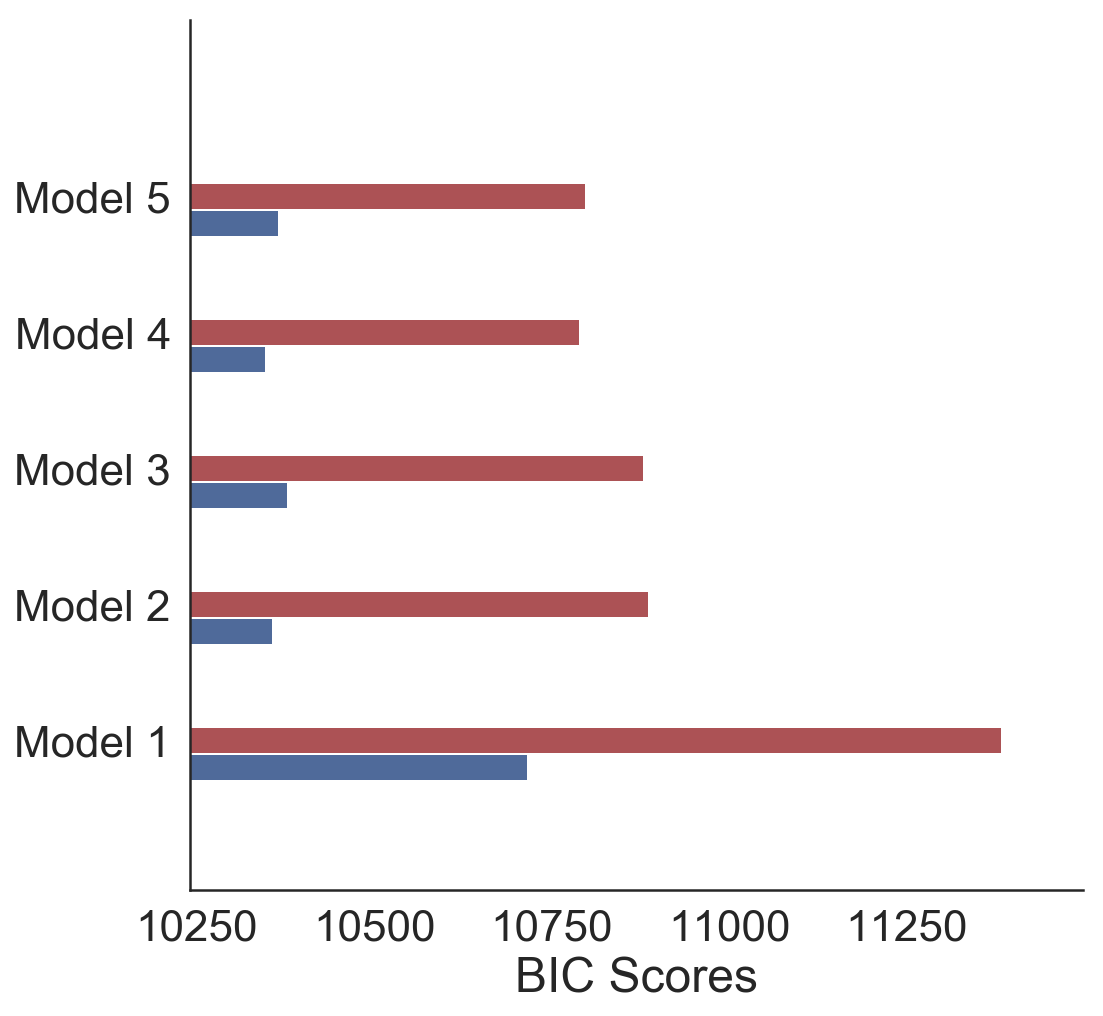

In [280]:
Confidence_Table_dislike['BIC'] = BIC1a
#BIC_bar(Confidence_Table_dislike.loc[0:, :].copy().reset_index(drop=True), title='',color1 = '#4F6A9A' )

BIC_bar2(Confidence_Table_like.loc[0:, :].copy().reset_index(drop=True),Confidence_Table_dislike.loc[0:, :].copy().reset_index(drop=True), title='',color1 ='#4F6A9A',color2 ='#AC5255' )
#plt.tight_layout()
#plt.savefig('../../figures/exp1_choice_models.png', dpi=600)

## Model 4 in both cases is the one with lower BIC altough the fits in dislike frames are worse


# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [174]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

<a id='LoadFunc'></a>
# 2. Defining Functions

### Split variable into participantwise quantiles

In [4]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Regression Coefficients Plot

In [5]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [6]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=40)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=40)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [7]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [8]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [52]:
def BIC_bar(data, title='title',color1 ='#5b7c99' ):
    
    # set figure-level properties
    sns.set(font_scale=2, style='white')
    fig = figure(figsize=(8,8))
    fig.add_subplot(111)
    top= subplot(111)
    
    # determine variables
    BIC = data['BIC'].get_values()
    N = len(data['BIC'])
    ylims = [data['BIC'].min()-(data['BIC'].max()/100), data['BIC'].max()+(data['BIC'].max()/100)]
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5      # the width of the bars

    # draw the bars
    rects1 = top.barh(ind, BIC, width, color=color1)

    # add some text for labels, title and axes ticks
    top.set_xlabel('BIC Scores')
    top.set_title(title)
    top.set_yticks(ind+width/2)
    top.set_yticklabels(data['Models'], rotation='horizontal')
    
    # set the axis limits
    top.set_xlim(ylims)
    top.set_ylim([-0.5, N])
    
    # hide spines
    top.spines['top'].set_visible(False)
    top.spines['right'].set_visible(False)

In [279]:
def BIC_bar2(data1,data2, title='title',color1 ='#5b7c99',color2 ='#AC5255' ):
    
    #Assuming data 1 and data2 contain the same dimensions
    # set figure-level properties
    sns.set(font_scale=2, style='white')
    fig = figure(figsize=(8,8))
    fig.add_subplot(111)
    top= subplot(111)
    
    # determine variables
    BIC1= data1['BIC'].get_values()
    BIC2 = data2['BIC'].get_values()
    N = len(data1['BIC'])
    ylims = [min(data1['BIC'].min()-(data1['BIC'].max()/100), data2['BIC'].min()-(data2['BIC'].max()/100)), max(data1['BIC'].max()+(data1['BIC'].max()/100),data2['BIC'].max()+(data2['BIC'].max()/100))]
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2      # the width of the bars

    # draw the bars
    rects1 = top.barh(ind-0.1, BIC1, width, color=color1)
    rects2 = top.barh(ind+0.1, BIC2, width, color=color2)

    # add some text for labels, title and axes ticks
    top.set_xlabel('BIC Scores')
    top.set_title(title)
    top.set_yticks(ind+width/2)
    top.set_yticklabels(data1['Models'], rotation='horizontal')
    
    # set the axis limits
    top.set_xlim(ylims)
    top.set_ylim([-1, N+0.4])
    
    # hide spines
    top.spines['top'].set_visible(False)
    top.spines['right'].set_visible(False)

In [230]:
# Just to generate additional file with all the measures separated by condition
#data_expL = data_exp1.loc[data_exp1['BlockCond'] == 1] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[data_exp1['BlockCond'] == 2] 

#data_expL.to_csv("InputData/FFAllData_Like.csv",index = False)
#data_expD.to_csv("InputData/FFAllData_Dislike.csv",index = False)